<a href="https://colab.research.google.com/github/juliomorbla/Proyecto_programacion_APR/blob/develop_bryan/Proyecto_pra%CC%81ctico(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Bryan Duque Gutiérrez
*   Alumno 2:
*   Alumno 3:






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
[]


---
### 1.4. Instalar librerías necesarias

In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.0


  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-urcdazxu
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-urcdazxu
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [7]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
import math
from collections import deque
import csv
from gym import wrappers
import io
import base64
from IPython.display import HTML

#### Configuración base

In [9]:
INPUT_SHAPE = (84, 84) #tamaño que tiene la imagen de observación
WINDOW_LENGTH = 4 #nº de observaciones que se toman como entrada

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [11]:
LEARNING_RATE = 0.00025

# Hiperparametros del agente
GAMMA = 0.97
TARGET_MODEL_UPDATE = 10000
TRAIN_INTERVAL = 24
DELTA_CLIP = 1.0

Guardar la configuración del experimento:

In [16]:
hyperparameters = {
    "INPUT_SHAPE": INPUT_SHAPE,
    "WINDOW_LENGTH": WINDOW_LENGTH,
    "LEARNING_RATE": LEARNING_RATE,
    "GAMMA": GAMMA,
    "TARGET_MODEL_UPDATE": TARGET_MODEL_UPDATE,
    "TRAIN_INTERVAL": TRAIN_INTERVAL,
    "DELTA_CLIP": DELTA_CLIP
}

# Nombre del archivo CSV
csv_file = 'hiperparametros.csv'

# Escribir los hiperparámetros en el archivo CSV
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Nombre', 'Valor'])
    for key, value in hyperparameters.items():
        writer.writerow([key, value])

In [17]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 6


In [18]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

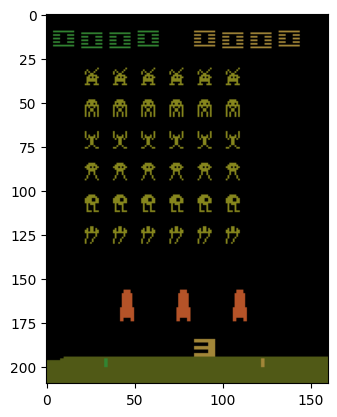

In [19]:
obs = env.reset()
plt.imshow(obs)
plt.show()

1. Implementación de la red neuronal

In [14]:
def create_dqn_model(input_shape, num_actions):
    model = Sequential()

    # Input layer
    model.add(InputLayer(input_shape=(input_shape[0], input_shape[1], input_shape[2]))) #(84, 84, 1)

    # Permute layer: para reorganizar las dimensiones, altura anchura y los canales
    model.add(Permute((2, 3, 1)))

    # Convolutional layers
    model.add(Conv2D(32, (8, 8), strides=4, activation='relu'))


    model.add(Conv2D(64, (4, 4), strides=2, activation='relu'))


    model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))

    # Flattening layer
    model.add(Flatten())

    # Fully connected  layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_actions, activation='linear'))

    return model

In [15]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
num_actions = nb_actions # Número de acciones posibles en Space Invaders que son 6

model = create_dqn_model(input_shape, num_actions)

NameError: name 'InputLayer' is not defined

2. Implementación de la solución DQN

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---